In [9]:
import obspy
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# read the data
staname = 'MX.XW00'
st = obspy.read(f'fwat_data/*/{staname}.*.sac')
baz = [tr.stats.sac.baz for tr in st]

Text(0.5, 1.0, 'Station XW00')

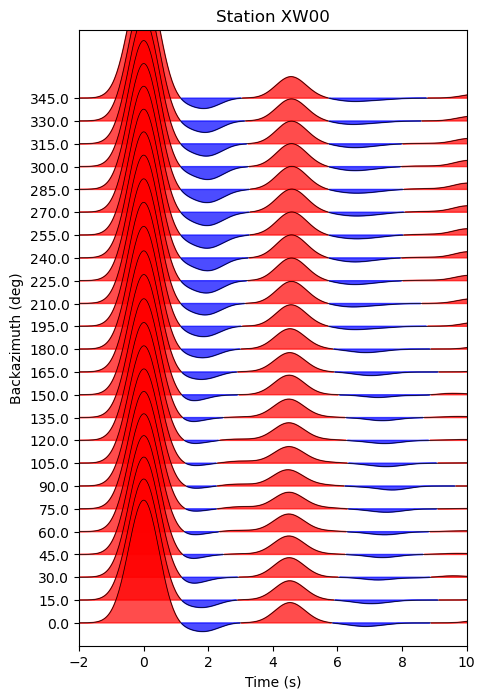

In [12]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111)
shift = 5.0
enf = 14
times = st[0].times() - shift
for i, tr in enumerate(st):
    bound = np.ones(tr.data.size) + i
    amp = tr.data * enf + bound
    ax.plot(times, amp, 'k', linewidth=0.5)
    ax.fill_between(times, bound, amp, where=amp > bound, color='r', alpha=0.7)
    ax.fill_between(times, bound, amp, where=amp < bound, color='b', alpha=0.7)
ax.set_xlabel('Time (s)')
ax.set_xlim(-2, 10)
ax.set_yticks(np.arange(len(baz)) + 1)
ax.set_yticklabels(baz)
ax.set_ylim(0, len(baz) + 3)
ax.set_ylabel('Backazimuth (deg)')
ax.set_title(f'Station {staname}')